In [1]:
# Library cell

library(ggplot2)
library(coefplot)

In [2]:
x <- 10:1
y <- - 4:5
q<-c("Hockey", "Football", "Baseball", "Curling", "Rugby", "Lacrosse", "Basketball", "Tennis", "Cricket", "Soccer")

In [3]:
DF <- data.frame(x,y,q)
DF

x,y,q
10,-4,Hockey
9,-3,Football
8,-2,Baseball
7,-1,Curling
6,0,Rugby
5,1,Lacrosse
4,2,Basketball
3,3,Tennis
2,4,Cricket
1,5,Soccer


In [4]:
theURL <- "http://www.jaredlander.com/data/TomatoFirst.csv"
tomato <- read.table(file=theURL, header=TRUE, sep=",")

head(tomato)

Round,Tomato,Price,Source,Sweet,Acid,Color,Texture,Overall,Avg.of.Totals,Total.of.Avg
1,Simpson SM,3.99,Whole Foods,2.8,2.8,3.7,3.4,3.4,16.1,16.1
1,Tuttorosso (blue),2.99,Pioneer,3.3,2.8,3.4,3.0,2.9,15.3,15.3
1,Tuttorosso (green),0.99,Pioneer,2.8,2.6,3.3,2.8,2.9,14.3,14.3
1,La Fede SM DOP,3.99,Shop Rite,2.6,2.8,3.0,2.3,2.8,13.4,13.4
2,Cento SM DOP,5.49,D Agostino,3.3,3.1,2.9,2.8,3.1,14.4,15.2
2,Cento Organic,4.99,D Agostino,3.2,2.9,2.9,3.1,2.9,15.5,15.1


In [5]:
data(diamonds, package='ggplot2')
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [6]:
# Page 159

library(XML)
library(httr)

URL <- 'http://www.jaredlander.com/2012/02/another-kind-of-super-bowl-pool/'

bowlPool <- readHTMLTable(rawToChar(GET(URL)$content), which=1, header= FALSE,stringsAsFactors=FALSE)

bowlPool

V1,V2,V3
Participant 1,Giant A,Patriot Q
Participant 2,Giant B,Patriot R
Participant 3,Giant C,Patriot S
Participant 4,Giant D,Patriot T
Participant 5,Giant E,Patriot U
Participant 6,Giant F,Patriot V
Participant 7,Giant G,Patriot W
Participant 8,Giant H,Patriot X
Participant 9,Giant I,Patriot Y
Participant 10,Giant J,Patriot Z


In [7]:
library(rvest)
library(xml2)

ribalta <- read_html('http://jaredlander.com/data/ribalta.html')
class(ribalta)

ribalta

Loading required package: xml2

Attaching package: 'rvest'

The following object is masked from 'package:XML':

    xml



[1] "xml_document" "xml_node"

{xml_document}
<html xmlns="http://www.w3.org/1999/xhtml">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body>\r\n<ul>\n<li class="address">\r\n    <span class="street">48 E 12t ...

In [8]:
ribalta %>% html_nodes('ul') %>% html_nodes('span')

{xml_nodeset (6)}
[1] <span class="street">48 E 12th St</span>
[2] <span class="city">New York</span>
[3] <span class="zip">10003</span>
[4] <span>\r\n    \t<span id="latitude" value="40.733384"></span>\r\n    \t<s ...
[5] <span id="latitude" value="40.733384"></span>
[6] <span id="longitude" value="-73.9915618"></span>

In [9]:
ribalta %>% html_nodes('.street')

{xml_nodeset (1)}
[1] <span class="street">48 E 12th St</span>

In [10]:
ribalta %>% html_nodes('.street') %>% html_text()

[1] "48 E 12th St"

In [11]:
ribalta %>% html_nodes('#longitude') %>% html_attr('value')

[1] "-73.9915618"

In [12]:
ribalta %>% html_nodes('table.food-items') %>% magrittr::extract2(5) %>% html_table()

X1,X2,X3
Marinara Pizza Rosse,"basil, garlic and oregano.",9
Doc Pizza Rosse,buffalo mozzarella and basil.,15
Vegetariana Pizza Rosse,"mozzarella cheese, basil and baked vegetables.",15
Brigante Pizza Rosse,"mozzarella cheese, salami and spicy oil.",15
Calzone Pizza Rosse,"ricotta, mozzarella cheese, prosciutto cotto and black pepper.",16
Americana Pizza Rosse,"mozzarella cheese, wurstel and fries.",16


In [13]:
library(jsonlite)

pizza <- fromJSON('http://www.jaredlander.com/data/PizzaFavorites.json')

pizza

Name,Details
Di Fara Pizza,"1424 Avenue J, Brooklyn , NY , 11230"
Fiore's Pizza,"165 Bleecker St, New York , NY , 10012"
Juliana's,"19 Old Fulton St, Brooklyn , NY , 11201"
Keste Pizza & Vino,"271 Bleecker St, New York , NY , 10014"
L & B Spumoni Gardens,"2725 86th St, Brooklyn , NY , 11223"
New York Pizza Suprema,"413 8th Ave, New York , NY , 10001"
Paulie Gee's,"60 Greenpoint Ave, Brooklyn , NY , 11222"
Ribalta,"48 E 12th St, New York , NY , 10003"
Totonno's,"1524 Neptune Ave, Brooklyn , NY , 11224"


In [14]:
class(pizza)

[1] "data.frame"

In [15]:
class(pizza$Name)

[1] "character"

In [16]:
class(pizza$Details)

[1] "list"

In [17]:
class(pizza$Details[[1]])

[1] "data.frame"

# Statistical Graphics

I will be using 'Diamonds' data from 'ggplot2' package

In [18]:
library(ggplot2)
data(diamonds)
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


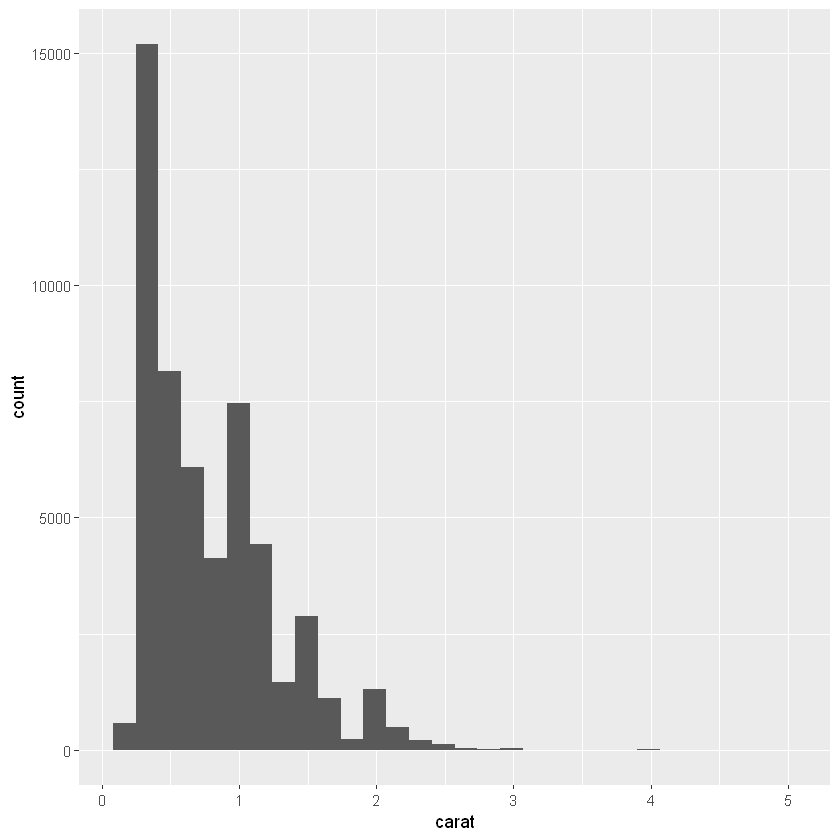

In [19]:
# Histogram

ggplot(data=diamonds) + geom_histogram(aes(x=carat))

# Density Plot of the Carat Distribution

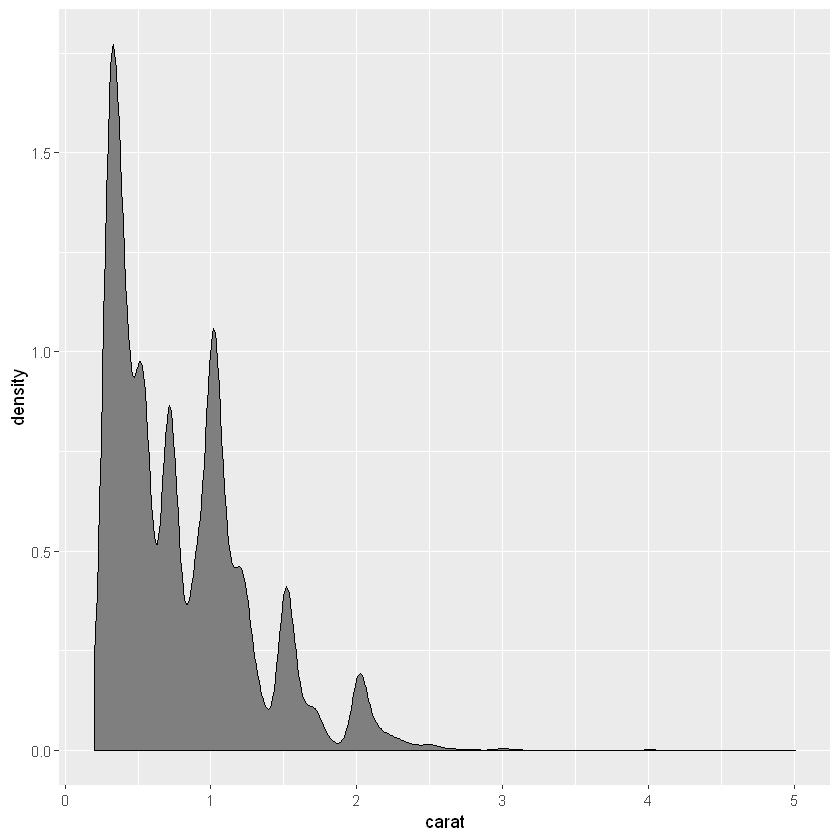

In [23]:
ggplot(data=diamonds)+ geom_density(aes(x=carat), fill ="grey50")

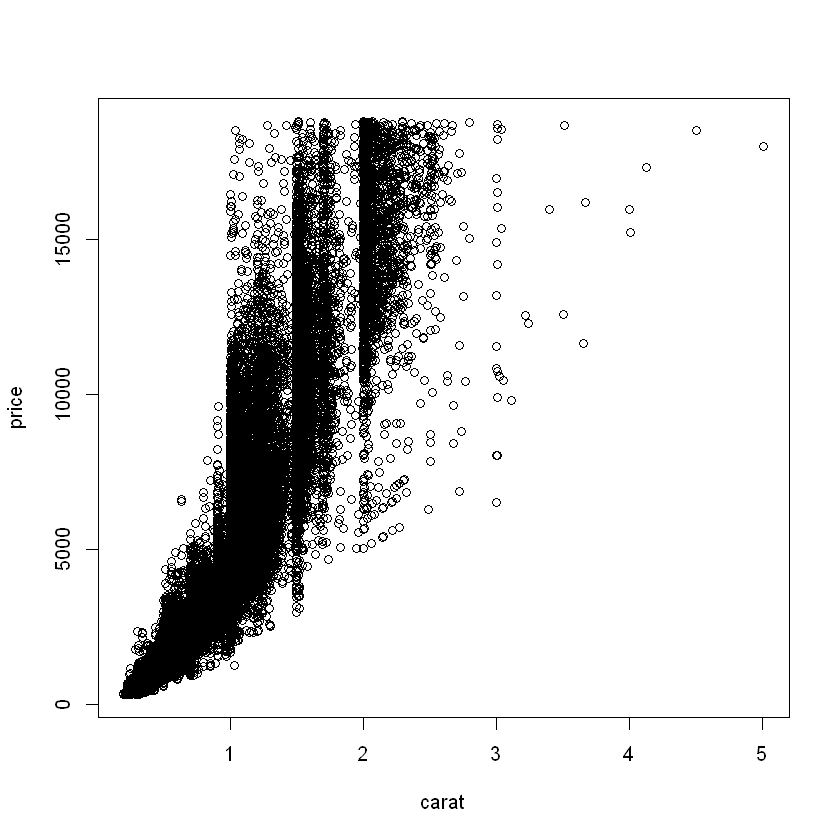

In [20]:
plot(price ~ carat, data=diamonds)